In [1]:
#! /bin/python
# -*- coding: utf-8 -*-
# --------- Imports and load the dataset into a dataframe --------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import for data manipulation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
# imports for models
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# Imports to calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Informations for reproductibility 
random_seed = 21

def data_generator(data):
    #  this script is to generate a random dataset from the originial one
    """

    @param data:
    @param seed:
    @return:
    """
    y = data['outcome']
    X = data.drop(['outcome'],axis=1)
    indexes_cols_drop = np.random.randint(len(X.columns),size=10)
    columns = list(X.columns)
    X = X.drop([columns[i] for i in range(len(columns)) if i in indexes_cols_drop],axis=1)
    nb_rows = np.random.randint(7000,len(X))
    indexes_rows = np.random.randint(len(X),size = nb_rows)
    data_for_project = pd.concat([X,y],axis=1)
    data_for_project = data_for_project.loc[indexes_rows,:]
    return data_for_project

# Generate a random dataset
np.random.seed(random_seed)
data = pd.read_csv("./Datasets/Dataset_project_RS.csv", index_col=0)
df = data_generator(data)
print("Job finshed")

Job finshed


In [2]:
# --------- Data profiling --------- #
GenDataProfile = False
if GenDataProfile:
    # Generate the profiling report
    profile = ProfileReport(df, title="Dataset Profiling Report", explorative=True)
    profile.to_file("Dataset_profile_report.html")
    
# --------- Data preprocessing --------- #
# drop the constant column based on the report ('num_outboud_cmds')
df = df.drop(columns=['num_outbound_cmds'], axis=1)
df_2 = df.copy()
df

,duration,protocol_type,service,flag,dst_bytes,land,wrong_fragment,logged_in,num_compromised,root_shell,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
81211,0,tcp,mtp,S0,0,0,0,0,0,0,...,0.01,0.37,0.0,255,1,0.00,0.35,0.12,0.0,portsweep
39572,0,udp,domain_u,SF,73,0,0,0,0,0,...,1.00,0.00,0.0,255,250,0.98,0.00,0.00,0.0,normal
93047,0,tcp,http,SF,42660,0,0,1,0,0,...,1.00,0.00,0.0,255,255,1.00,0.00,0.00,0.0,normal
7884,0,tcp,smtp,SF,401,0,0,1,0,0,...,1.00,0.00,1.0,92,156,0.76,0.00,0.00,0.0,normal
9400,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.08,0.0,255,8,0.03,0.00,1.00,1.0,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21037,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.88,0.25,0.0,7,8,1.00,1.00,0.00,0.0,neptune
45108,0,udp,private,SF,147,0,0,0,0,0,...,1.00,0.00,0.0,137,135,0.99,0.00,0.00,0.0,normal
6301,0,tcp,http,SF,4841,0,0,1,0,0,...,1.00,0.00,0.5,5,255,1.00,0.00,0.00,0.0,normal
55721,0,tcp,netbios_dgm,S0,0,0,0,0,0,0,...,0.08,0.06,0.0,255,16,0.06,1.00,0.00,0.0,neptune


In [3]:
# --------- Parametering for models training and tests --------- #
# Label Encoding for the target variable (y=outcome)
target_le = LabelEncoder()  
df['outcome'] = target_le.fit_transform(df['outcome'])

# Split the data into features (X) and target (y)
X_base = df.drop('outcome', axis=1)
X = X_base.copy()
X_BASE_2 = X_base.copy()
X_2ndROUND=X_base.copy()
y = df['outcome']

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Apply One-Hot Encoding to non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# Apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Job finshed")

Non-numeric columns: Index(['protocol_type', 'service', 'flag'], dtype='object')
Job finshed



MLP Results:
Accuracy: 0.9843894085100777
Classification Report:
                  precision    recall  f1-score   support

           back       0.97      0.97      0.97       106
buffer_overflow       1.00      0.50      0.67         4
      ftp_write       0.00      0.00      0.00         1
   guess_passwd       0.86      0.86      0.86         7
           imap       0.00      0.00      0.00         0
        ipsweep       0.80      0.94      0.86       436
           land       0.50      1.00      0.67         2
     loadmodule       0.00      0.00      0.00         0
       multihop       0.00      0.00      0.00         1
        neptune       1.00      1.00      1.00      4958
           nmap       0.78      0.45      0.57       197
         normal       0.99      0.99      0.99      8156
            pod       0.94      1.00      0.97        31
      portsweep       1.00      0.97      0.98       334
        rootkit       0.00      0.00      0.00         2
          satan     

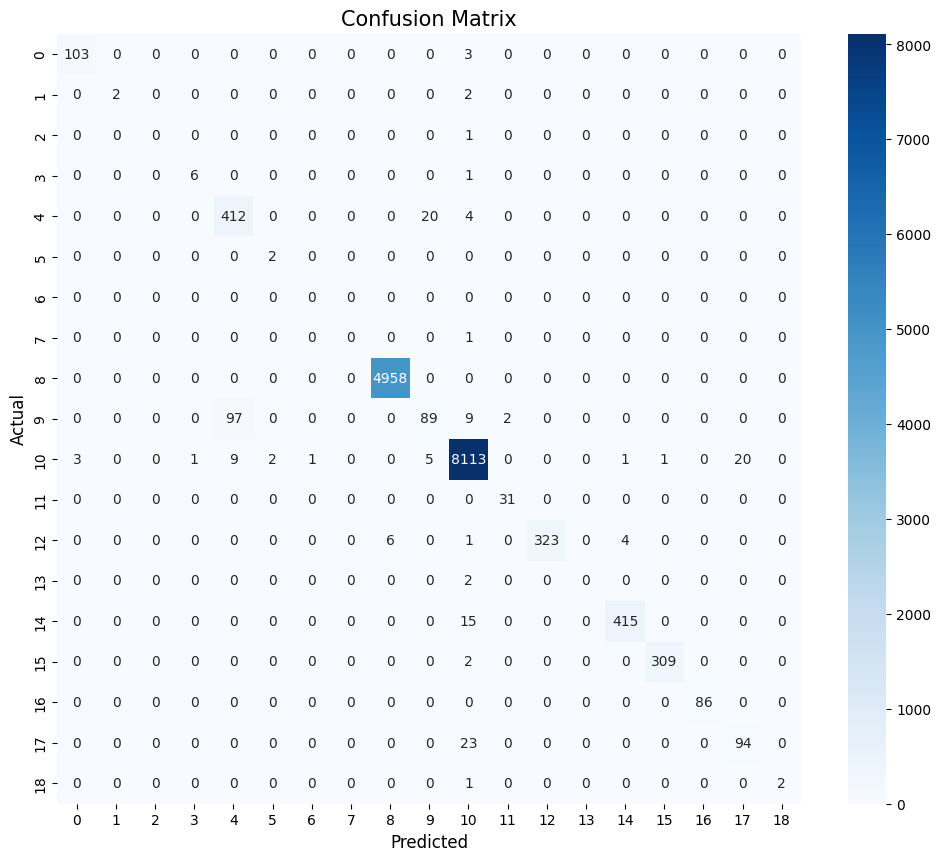

In [4]:
# --------- Model : Multilayer Perception model --------- #
# train the model and make predictions
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=random_seed)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluation metrics : Classification Report and Confusion Matrix
# Evaluation for MLP
print("\nMLP Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp, target_names=target_le.classes_, labels=target_le.transform(target_le.classes_),zero_division=0))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
# Set figure size for a larger plot
plt.figure(figsize=(12, 10)) 
# Plot heatmap with larger font sizes for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', annot_kws={"size": 10})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()


Best MLP Results:
Accuracy: 0.9829403240679753
Classification Report:
                  precision    recall  f1-score   support

           back       0.98      0.97      0.98       106
buffer_overflow       0.67      0.50      0.57         4
      ftp_write       0.00      0.00      0.00         1
   guess_passwd       0.86      0.86      0.86         7
           imap       0.00      0.00      0.00         0
        ipsweep       0.76      0.99      0.86       436
           land       0.50      1.00      0.67         2
     loadmodule       0.00      0.00      0.00         0
       multihop       0.00      0.00      0.00         1
        neptune       1.00      1.00      1.00      4958
           nmap       0.95      0.30      0.46       197
         normal       0.99      0.99      0.99      8156
            pod       0.97      1.00      0.98        31
      portsweep       1.00      0.96      0.98       334
        rootkit       0.00      0.00      0.00         2
          satan

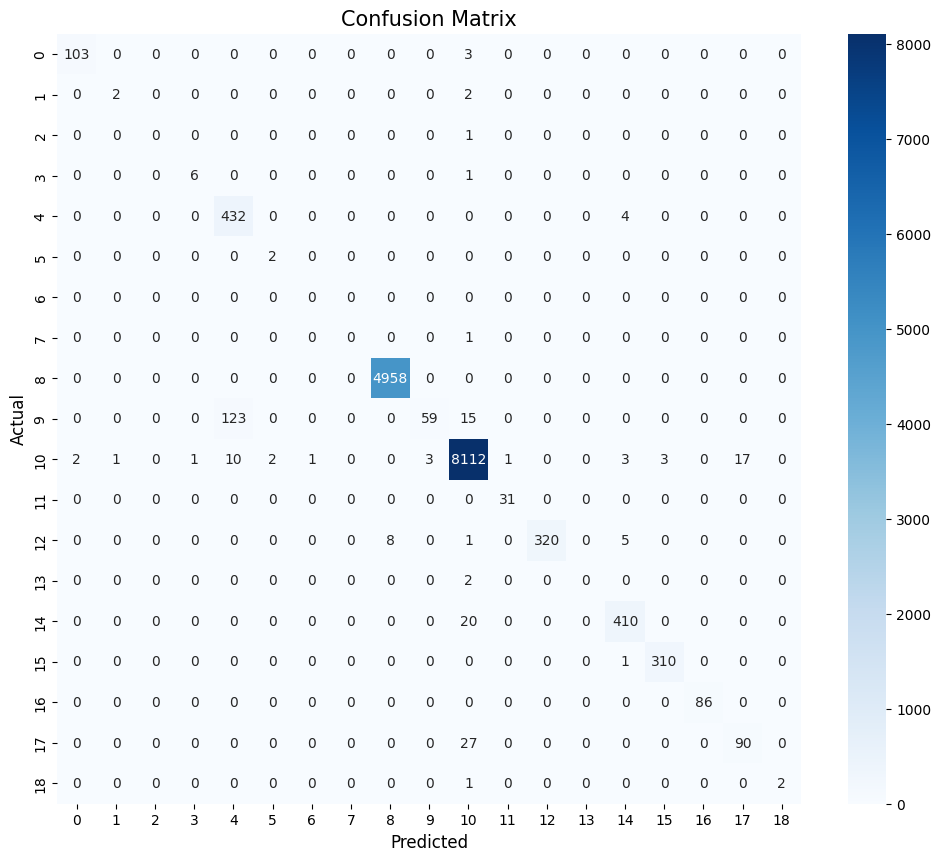

In [5]:
# ------------------- HyperParameter Tuning -------------------
DEBUG=False
if DEBUG:
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50, 25)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
    # Initialize MLPClassifier
    mlp = MLPClassifier(max_iter=300, random_state=random_seed)
    # Perform grid search
    grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='recall', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Print the best parameters found
    print(f"Best parameters: {grid_search.best_params_}")
    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)
else :
    # We know the best case by running it previously 
    best_model = MLPClassifier(max_iter=300, hidden_layer_sizes=(50, ), alpha=0.0001, solver='adam',activation='relu',learning_rate='constant',random_state=random_seed)
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)
    
# Evaluation metrics : Classification Report and Confusion Matrix
# Evaluation for MLP
print("\nBest MLP Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best, target_names=target_le.classes_, labels=target_le.transform(target_le.classes_),zero_division=0))
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
# Set figure size for a larger plot
plt.figure(figsize=(12, 10)) 
# Plot heatmap with larger font sizes for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', annot_kws={"size": 10})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [6]:
# ----- Feature selection : drop unimportant features----- #
# --------- Model : Decision Tree --------- #
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree

# Apply Label Encoding to non-numeric columns for Decision Tree
label_encoder_tree = LabelEncoder()
for col in non_numeric_cols:
    X_base[col] = label_encoder_tree.fit_transform(X_base[col])

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_base, y, test_size=0.3, random_state=random_seed)

# Initialize and train the model
clf_1 = DecisionTreeClassifier(criterion='gini', max_depth=10000, random_state=random_seed)
clf_1.fit(X_train_tree, y_train_tree)

# Get feature importance
importances = clf_1.feature_importances_
feat_importances = pd.DataFrame({'Feature': X_base.columns, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)
# Display the most important features
print('Most Important :')
print(feat_importances.head(10))
print('Least Important :')
print(feat_importances.tail(10))
# DROP all the features with an importance of 0
zero_importance_features = feat_importances[feat_importances['Importance'] == 0]['Feature'].tolist()
print(f"Features with zero importance: {zero_importance_features} -> {len(zero_importance_features)}")
X_2ndROUND=X_2ndROUND.drop(columns=zero_importance_features)

# Identify non-numeric columns
non_numeric_cols = X_2ndROUND.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Apply One-Hot Encoding to non-numeric columns
X_2ndROUND = pd.get_dummies(X_2ndROUND, columns=non_numeric_cols)

# Perform the train-test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2ndROUND, y, test_size=0.3, random_state=random_seed)

# Apply StandardScaler
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

print("Job finished")

Most Important :
                     Feature  Importance
22             same_srv_rate    0.513759
1              protocol_type    0.089746
23             diff_srv_rate    0.071117
16                     count    0.039592
28      dst_host_serror_rate    0.032410
30  dst_host_srv_rerror_rate    0.032067
25            dst_host_count    0.029252
3                       flag    0.028347
6             wrong_fragment    0.026732
27    dst_host_same_srv_rate    0.026729
Least Important :
               Feature  Importance
7            logged_in    0.001642
19     srv_serror_rate    0.000242
13    num_access_files    0.000178
9           root_shell    0.000138
11  num_file_creations    0.000009
14       is_host_login    0.000000
21     srv_rerror_rate    0.000000
12          num_shells    0.000000
10        su_attempted    0.000000
5                 land    0.000000
Features with zero importance: ['is_host_login', 'srv_rerror_rate', 'num_shells', 'su_attempted', 'land'] -> 5
Non-numeric column


Best MLP Results 2:
Accuracy: 0.9824792517454881
Classification Report:
                  precision    recall  f1-score   support

           back       0.98      0.97      0.98       106
buffer_overflow       0.67      0.50      0.57         4
      ftp_write       0.00      0.00      0.00         1
   guess_passwd       1.00      0.86      0.92         7
           imap       0.00      0.00      0.00         0
        ipsweep       0.77      0.99      0.86       436
           land       0.50      1.00      0.67         2
     loadmodule       0.00      0.00      0.00         0
       multihop       0.00      0.00      0.00         1
        neptune       1.00      1.00      1.00      4958
           nmap       0.88      0.37      0.52       197
         normal       0.99      0.99      0.99      8156
            pod       1.00      1.00      1.00        31
      portsweep       0.99      0.97      0.98       334
        rootkit       1.00      0.50      0.67         2
          sat

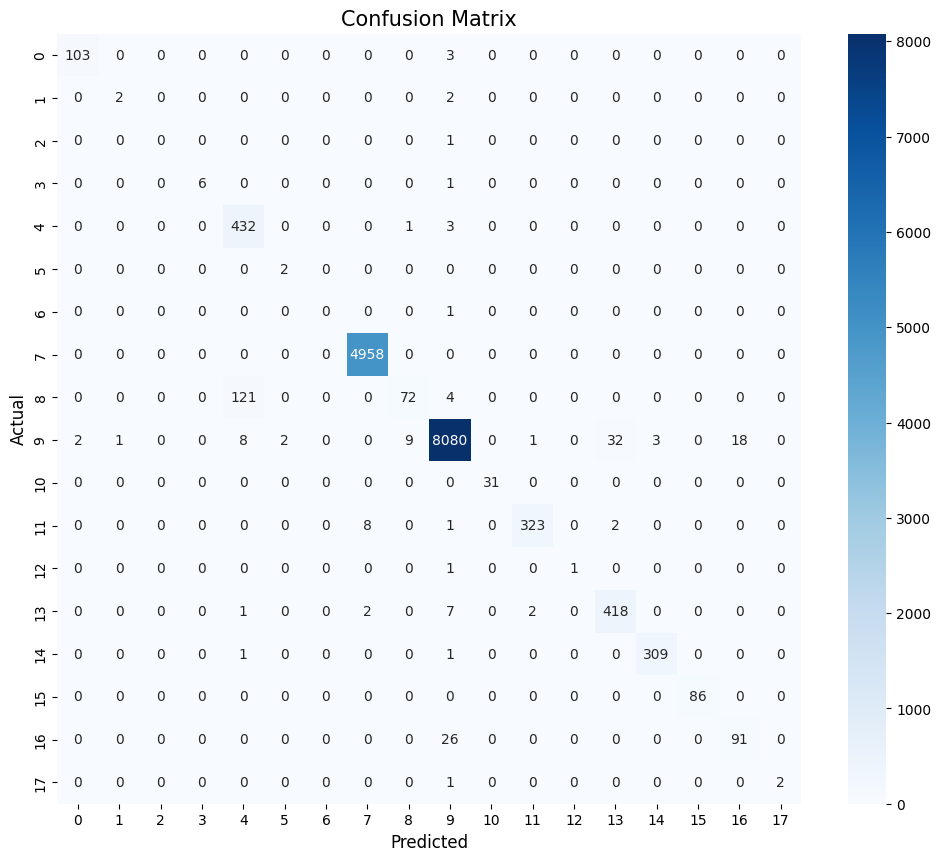

In [7]:
# Second round of grid search
DEBUG = False
if DEBUG :
    param_grid = {
            'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50, 25)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive']
        }
        
    # Initialize MLPClassifier
    mlpGRID2 = MLPClassifier(max_iter=300, random_state=random_seed)
    
    # Perform grid search
    grid_search = GridSearchCV(mlpGRID2, param_grid, cv=3, scoring='recall', n_jobs=-1)
    grid_search.fit(X_train_2, y_train_2)
    # Print the best parameters found
    print(f"Best parameters: {grid_search.best_params_}")
    # Evaluate the best model on the test set
    best_model_2 = grid_search.best_estimator_
    y_pred_best_2 = best_model_2.predict(X_test_2)

else :
    # We know the best case by running it previously 
    best_model_2 = MLPClassifier(max_iter=300, hidden_layer_sizes=(50,), alpha=0.0001, solver='adam',activation='relu',learning_rate='constant',random_state=random_seed)
    best_model_2.fit(X_train_2, y_train_2)
    y_pred_best_2 = best_model_2.predict(X_test_2)
    
# Evaluation metrics : Classification Report and Confusion Matrix
# Evaluation for MLP
print("\nBest MLP Results 2:")
print("Accuracy:", accuracy_score(y_test_2, y_pred_best_2))
print("Classification Report:\n", classification_report(y_test_2, y_pred_best_2, target_names=target_le.classes_, labels=target_le.transform(target_le.classes_),zero_division=0))
# Compute confusion matrix
cm = confusion_matrix(y_test_2, y_pred_best_2)
# Set figure size for a larger plot
plt.figure(figsize=(12, 10)) 
# Plot heatmap with larger font sizes for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', annot_kws={"size": 10})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [8]:
# --------- data change : Combine Rare Classes --------- #
# Find the frequency of each class in 'outcome'
outcome_counts = df_2['outcome'].value_counts()

# Define a threshold below which classes will be combined
threshold = 10

# Modify the existing 'outcome' column, replacing rare classes with "other malicious"
df_2['outcome'] = df_2['outcome'].apply(lambda x: x if outcome_counts[x] >= threshold else 'other malicious')

# Print class distribution after combining rare classes
print("Classes after combining rare ones:\n", df_2['outcome'].value_counts())

# --------- Decision Tree (for Feature Importance) --------- #
# Create a copy of the dataframe for the Decision Tree
X_tree_2 = df_2.copy()

# Identify non-numeric columns for Label Encoding in Decision Tree
non_numeric_cols = X_tree_2.select_dtypes(include=['object']).columns

# Apply Label Encoding to non-numeric columns for the Decision Tree
label_encoder_tree = LabelEncoder()
for col in non_numeric_cols:
    X_tree_2[col] = label_encoder_tree.fit_transform(X_tree_2[col])

# Split the data into features (X_tree_2) and target (y_tree)
X_tree_2 = X_tree_2.drop('outcome', axis=1)
y_tree = df_2['outcome']

# Perform the train-test split
X_train_tree_2, X_test_tree_2, y_train_tree_2, y_test_tree_2 = train_test_split(X_tree_2, y_tree, test_size=0.3, random_state=random_seed)

# Initialize and train the Decision Tree model
clf_2 = DecisionTreeClassifier(criterion='gini', max_depth=10000, random_state=random_seed)
clf_2.fit(X_train_tree_2, y_train_tree_2)

# Get feature importance
importances = clf_2.feature_importances_
feat_importances = pd.DataFrame({'Feature': X_tree_2.columns, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Display the most important features
print('Most Important :')
print(feat_importances.head(10))
print('Least Important :')
print(feat_importances.tail(10))

# DROP all the features with an importance of 0
zero_importance_features = feat_importances[feat_importances['Importance'] == 0]['Feature'].tolist()
print(f"Features with zero importance: {zero_importance_features} -> {len(zero_importance_features)}")

# Update X by dropping zero-importance features
df_2 = df_2.drop(columns=zero_importance_features)

# --------- Parametering for models training and tests --------- #
# Label Encoding for the target variable (y=outcome)
target_le_combined = LabelEncoder()  
df_2['outcome'] = target_le_combined.fit_transform(df_2['outcome'])

# Split the data into features (X) and target (y)
X_3 = df_2.drop('outcome', axis=1)
y_3 = df_2['outcome']

# Identify non-numeric columns for One-Hot Encoding
non_numeric_cols = X_3.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Apply One-Hot Encoding to non-numeric columns
X_3 = pd.get_dummies(X_3, columns=non_numeric_cols)

# Perform the train-test split with stratification
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, stratify=y_3, random_state=random_seed)

# Apply StandardScaler to normalize features
scaler = StandardScaler()
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

print("Job finished")

Classes after combining rare ones:
 outcome
normal             27058
neptune            16484
satan               1524
ipsweep             1428
smurf               1087
portsweep           1080
nmap                 658
back                 404
warezclient          372
teardrop             362
pod                   87
other malicious       31
guess_passwd          15
buffer_overflow       14
Name: count, dtype: int64
Most Important :
                     Feature  Importance
22             same_srv_rate    0.513802
1              protocol_type    0.089568
23             diff_srv_rate    0.070964
16                     count    0.039649
28      dst_host_serror_rate    0.032370
30  dst_host_srv_rerror_rate    0.032154
25            dst_host_count    0.028990
3                       flag    0.028008
27    dst_host_same_srv_rate    0.027324
6             wrong_fragment    0.026732
Least Important :
               Feature  Importance
7            logged_in    0.001652
19     srv_serror_rate  


Best MLP Results 3:
Accuracy: 0.982084046897642
Classification Report:
                  precision    recall  f1-score   support

           back       0.98      1.00      0.99       121
buffer_overflow       1.00      1.00      1.00         4
   guess_passwd       1.00      1.00      1.00         5
        ipsweep       0.76      0.95      0.85       428
        neptune       1.00      1.00      1.00      4946
           nmap       0.76      0.38      0.50       197
         normal       0.99      0.99      0.99      8118
other malicious       0.44      0.78      0.56         9
            pod       0.93      0.96      0.94        26
      portsweep       0.98      0.97      0.97       324
          satan       0.99      0.93      0.96       457
          smurf       1.00      0.99      1.00       326
       teardrop       1.00      1.00      1.00       109
    warezclient       0.82      0.75      0.78       112

       accuracy                           0.98     15182
      macro a

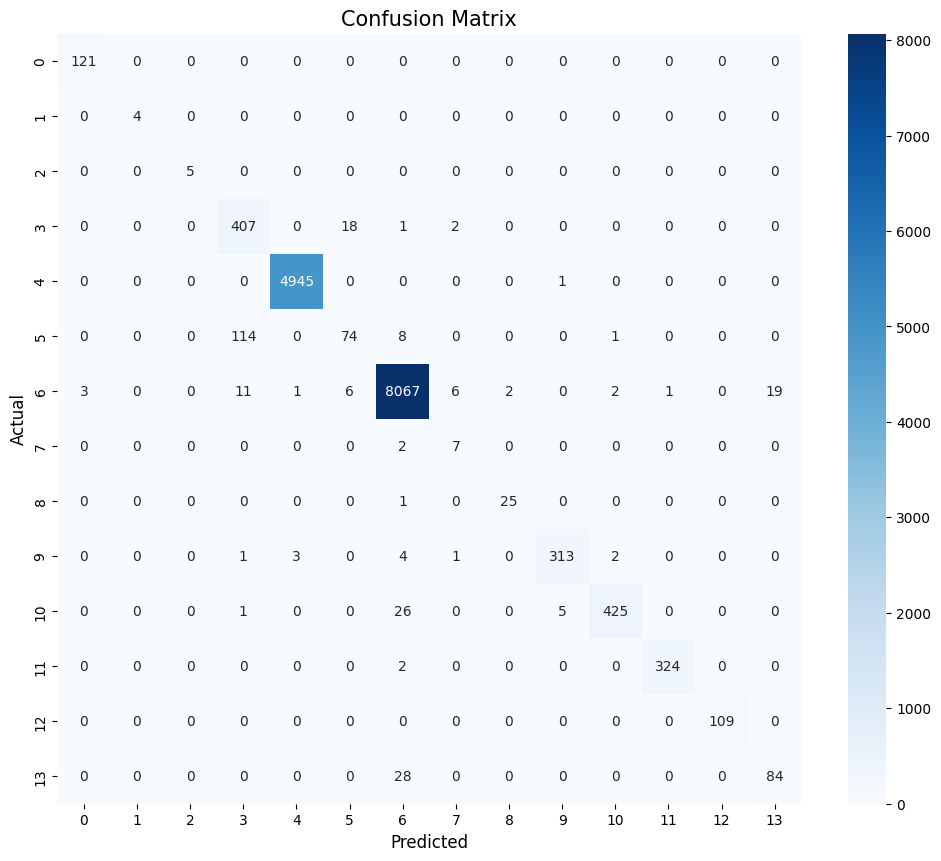

In [9]:
# Third round of grid search
DEBUG = False

if DEBUG:
    param_grid = {
            'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50, 25)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive']
        } 
    # Initialize MLPClassifier
    mlp_3 = MLPClassifier(max_iter=300, random_state=random_seed)
    # Perform grid search
    grid_search = GridSearchCV(mlp_3, param_grid, cv=3, scoring='recall', n_jobs=-1)
    grid_search.fit(X_train_3, y_train_3)
    # Print the best parameters found
    print(f"Best parameters: {grid_search.best_params_}")
    # Evaluate the best model on the test set
    best_model_3 = grid_search.best_estimator_
    y_pred_best_3 = best_model_3.predict(X_test_3)
else:
    # We know the best case by running it previously 
    best_model_3 = MLPClassifier(max_iter=300, hidden_layer_sizes=(50,), alpha=0.0001, solver='adam',activation='relu',learning_rate='constant',random_state=random_seed)
    best_model_3.fit(X_train_3, y_train_3)
    y_pred_best_3 = best_model_3.predict(X_test_3)

# Evaluation metrics : Classification Report and Confusion Matrix
# Evaluation for MLP
print("\nBest MLP Results 3:")
print("Accuracy:", accuracy_score(y_test_3, y_pred_best_3))
print("Classification Report:\n", classification_report(y_test_3, y_pred_best_3, target_names=target_le_combined.classes_, labels=target_le_combined.transform(target_le_combined.classes_),zero_division=0))

# Compute confusion matrix
cm = confusion_matrix(y_test_3, y_pred_best_3)

# Set figure size for a larger plot
plt.figure(figsize=(12, 10)) 

# Plot heatmap with larger font sizes for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', annot_kws={"size": 10})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [10]:
# ----------------- BONUS : performance of other models with initial dataset-----------------

# --------- Model : Logistic Regression model --------- #

# train the model
lr_model = LogisticRegression(random_state=random_seed, max_iter=10000)
lr_model.fit(X_train, y_train)
# Make predictions
y_pred_lr = lr_model.predict(X_test)

#  --------- Model : KNN --------- 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# --------- Model : Decision Tree  --------- #
# Create a copy of the dataframe for the Decision Tree
X_tree = df.copy()

# Identify non-numeric columns for Label Encoding in Decision Tree
non_numeric_cols = X_tree.select_dtypes(include=['object']).columns

# Apply Label Encoding to non-numeric columns for the Decision Tree
label_encoder_tree = LabelEncoder()
for col in non_numeric_cols:
    X_tree[col] = label_encoder_tree.fit_transform(X_tree[col])

# Split the data into features (X_tree) and target (y_tree)
X_tree = X_tree.drop('outcome', axis=1)
y_tree = df['outcome']

# Perform the train-test split
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.3, random_state=random_seed)

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=10000, random_state=random_seed)
clf.fit(X_train_tree, y_train_tree)

# Make predictions
y_pred_clf = clf.predict(X_test_tree)

#  --------- Evalutations --------- 

# Evaluation for LR
print("\nLR Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=target_le.classes_, labels=target_le.transform(target_le.classes_), zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Evaluation for Decision Tree
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_clf))
print("Classification Report:\n", classification_report(y_test, y_pred_clf, target_names=target_le.classes_, labels=target_le.transform(target_le.classes_), zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_clf))

# Evaluation for KNN
print("\nKNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=target_le.classes_, labels=target_le.transform(target_le.classes_), zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Accuracy Comparaison
print("\n RECAP : \n")
print(f"Decision tree Accuracy: {accuracy_score(y_test, y_pred_clf):.2f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"MLP Accuracy: {accuracy_score(y_test, y_pred_mlp):.2f}")
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")


LR Results:
Accuracy: 0.9712817810565143
Classification Report:
                  precision    recall  f1-score   support

           back       0.62      0.42      0.50       106
buffer_overflow       0.33      0.25      0.29         4
      ftp_write       0.00      0.00      0.00         1
   guess_passwd       0.86      0.86      0.86         7
           imap       0.00      0.00      0.00         0
        ipsweep       0.76      0.92      0.83       436
           land       0.50      1.00      0.67         2
     loadmodule       0.00      0.00      0.00         0
       multihop       0.00      0.00      0.00         1
        neptune       1.00      1.00      1.00      4958
           nmap       0.59      0.28      0.38       197
         normal       0.98      0.99      0.98      8156
            pod       1.00      1.00      1.00        31
      portsweep       0.99      0.92      0.95       334
        rootkit       0.00      0.00      0.00         2
          satan      